<a href="https://colab.research.google.com/github/sakaleshhubli/AI/blob/main/LR_for_used_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [ ]:
used_cars_url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/usedcars.csv"
df = pd.read_csv(used_cars_url)

In [ ]:
df.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df.mileage.describe()

,mileage
count,150.000000
mean,44260.646667
std,26982.104322
min,4867.000000
25%,27200.250000
50%,36385.000000
75%,55124.500000
max,151479.000000


In [ ]:
df.model.unique()

array(['SEL', 'SE', 'SES'], dtype=object)

In [ ]:
df['model'].value_counts()

,count
model,
SE,78
SES,49
SEL,23


In [ ]:
avg_price_per_model = df.groupby('model')['price'].mean()
avg_price_per_model


,price
model,
SE,12202.128205
SEL,16109.260870
SES,12694.102041


In [ ]:
fig = px.violin(df,
                x='model',
                y='price')

fig.show()

In [ ]:
fig = px.scatter(df,
                 x='mileage',
                 y='price',
                 color='model',       # Colors points by model
                #  symbol = 'transmission',
                 title='Price vs Mileage by Model')
fig.show()


#**Insights**
1. as the number of miles driven (mileage) increases the price of used car decreases.
2. generally SEL models are expensive and less in count
3. SE models are cheaper and more in count than other models(SEL and SES)
4. SES model lie in between
5. Outliers exist

In [ ]:
df['transmission'].value_counts()

,count
transmission,
AUTO,128
MANUAL,22


In [ ]:
fig = px.box(df,
             x='transmission',
             y='price',
             facet_col='model',
             title='Price Distribution by Transmission for Each Model',
             points='all',
             color='transmission'
             )

fig.show()


SEL tends to have the highest prices, especially for AUTO transmission, with some listings reaching up to ~20k.

SE and SES models are generally priced lower, with most AUTO transmissions clustered around 10k–15k and MANUAL transmissions often below 10k

The hierarchy in pricing aligns with the model tiers: SEL (highest) > SES ≈ SE (lower)

Potential Outliers: A few SEL listings (AUTO) are priced much higher (~20k) than the rest, possibly due to low mileage (as seen in the dataset head, where high-priced SELs have ~7k–11k miles) or other factors like color (Yellow, Gray, Silver in the sample).

In [ ]:
fig = px.scatter(df,
                 x= 'year',
                 y = 'price',
                 color = 'model',
                 title = 'Price vs Year by Model'
                 )
fig.show()

higher the year higher the price

In [ ]:
fig = px.scatter(df,
                 x= 'color',
                 y = 'price',
                #color = 'model',
                 title = 'Price vs Year by Model'
                 )
fig.show()

In [ ]:
df[['year', 'price', 'mileage']].corr()

,year,price,mileage
year,1.000000,0.845004,-0.760313
price,0.845004,1.000000,-0.806149
mileage,-0.760313,-0.806149,1.000000


<div style="background-color: white; color: black; padding: 15px; border-radius: 10px; line-height: 1.6;">

Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here:  
👉 https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

</div>


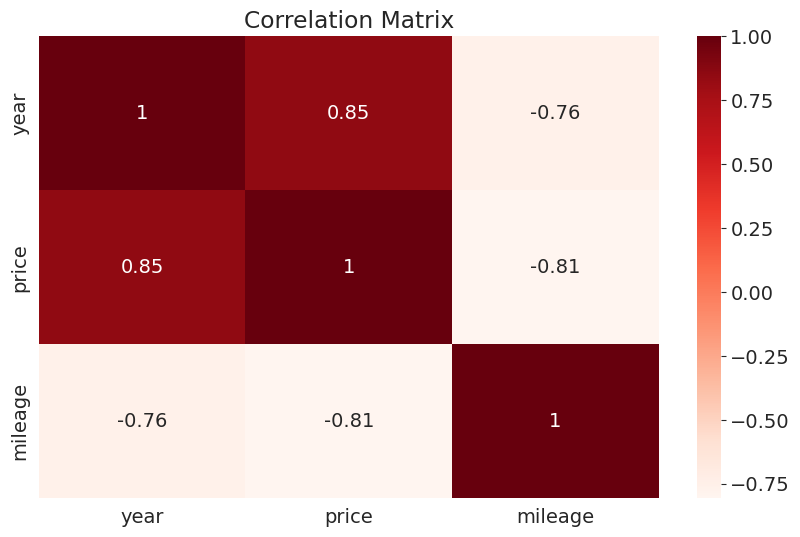

In [ ]:
# Select only numeric columns before computing correlation
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')
plt.show()


## **Insights Drawn from Exploratory Data Analysis (EDA)**

1. **Mileage vs. Price**  
   There is a clear inverse relationship between mileage and price — as the number of miles driven increases, the price of the used car tends to decrease. This reflects the natural depreciation of vehicles with higher usage.

2. **Model-wise Distribution & Pricing**  
   - **SEL models** are generally the most expensive but also the least common in the dataset.  
   - **SE models** are the most affordable and occur more frequently than SEL and SES variants.  
   - **SES models** are positioned in the middle, both in terms of pricing and count.  
   This aligns with the brand’s tiering strategy: **SEL (premium) > SES (mid) ≈ SE (base)**.

3. **Year vs. Price**  
   Newer cars (higher year values) are associated with higher prices, which is intuitive — recent models indicate less wear and better technology, thereby commanding a premium.

4. **Transmission vs. Price (Model Interaction)**  
   - SEL models with **automatic transmission** have the highest price tags, with some listings reaching **up to $20,000**.  
   - SE and SES models are priced more modestly:
     - **Automatic transmissions** tend to cluster around **$10,000–$15,000**
     - **Manual transmissions** are typically listed for **below $10,000**  
   This suggests a general preference and higher market value for **automatic transmission** across all models.

5. **Outliers & Influencing Factors**  
   A handful of **high-priced SEL-AUTO listings (~$20,000)** stand out as potential outliers. These may be justified by:
   - Exceptionally **low mileage** (e.g., 7k–11k miles)
   - Possibly attractive or rare **colors** (e.g., Yellow, Gray, Silver)
   - Additional unseen factors like trim features or owner history

6. **Color vs. Price**  
   No significant or consistent relationship was observed between the **color of the car** and its **price**. While certain colors (e.g., Yellow or Silver) appeared among high-priced listings, the data does not provide enough evidence to confirm color as a strong influencing factor.


We now know that the "year" and "mileage" columns have the strongest correlation with "price". Let's try to find a way of estimating the value of "price" using the value of "mileage"

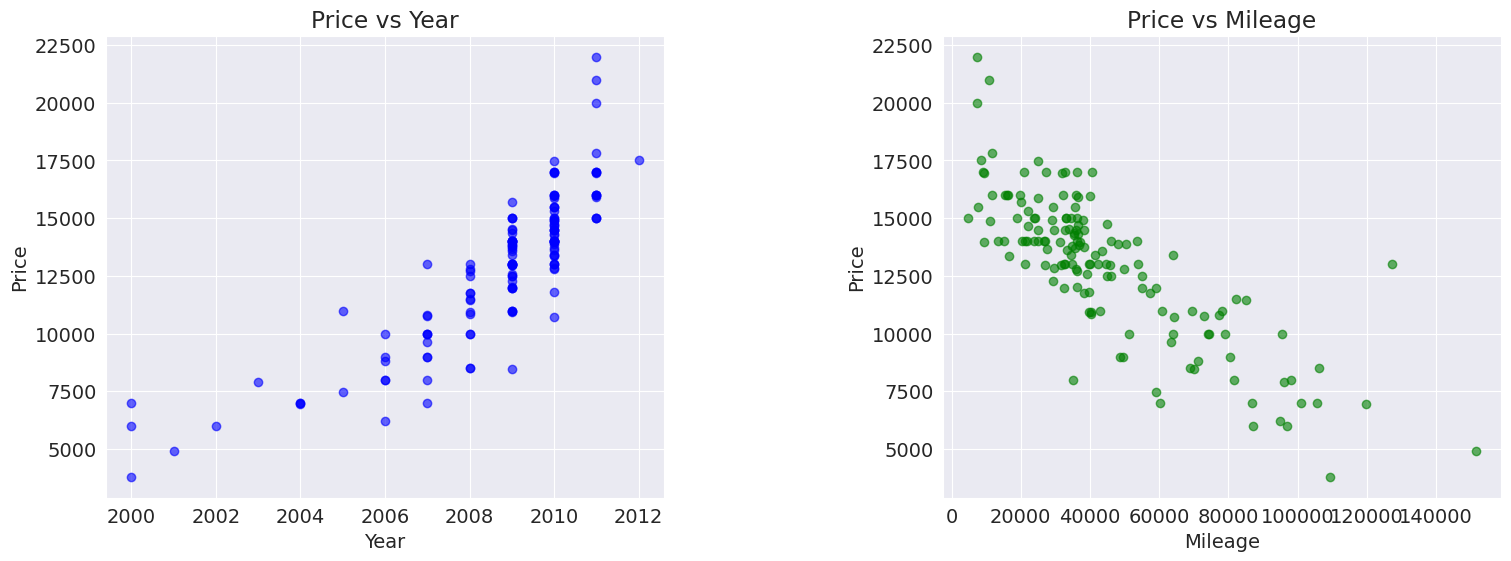

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'wspace': 0.5, 'width_ratios': [1,1]})

# Price vs Year
axes[0].scatter(df['year'], df['price'], color='blue', alpha=0.6)
axes[0].set_title('Price vs Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Price')
axes[0].grid(True)

# Price vs Mileage
axes[1].scatter(df['mileage'], df['price'], color='green', alpha=0.6)
axes[1].set_title('Price vs Mileage')
axes[1].set_xlabel('Mileage')
axes[1].set_ylabel('Price')
axes[1].grid(True)

plt.show()

In [ ]:
X_year = df[['year']]
X_mileage = df[['mileage']]
y = df['price']

In [ ]:
model_year = LinearRegression()
model_year.fit(X_year, y)
y_pred_year = model_year.predict(X_year)

In [ ]:
model_mileage = LinearRegression()
model_mileage.fit(X_mileage, y)
y_pred_mileage = model_mileage.predict(X_mileage)

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Price vs Year", "Price vs Mileage"))

fig.add_trace(
    go.Scatter(x=df['year'], y=y, mode='markers', name='Data (Year)', marker=dict(color='blue')),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=df['year'], y=y_pred_year, mode='lines', name='LR Line (Year)', line=dict(color='red')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=df['mileage'], y=y, mode='markers', name='Data (Mileage)', marker=dict(color='green')),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=df['mileage'], y=y_pred_mileage, mode='lines', name='LR Line (Mileage)', line=dict(color='red')),
    row=1, col=2
)

fig.update_layout(height=360, width=1080, showlegend=True)
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_xaxes(title_text="Mileage", row=1, col=2)
fig.update_yaxes(title_text="Price", row=1, col=2)


fig.update_layout(height=600, width=1500, showlegend=True)
fig.show()



In [ ]:
X = df[['mileage', 'year']]
y = df['price']

In [ ]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
mileage_range = np.linspace(df['mileage'].min(), df['mileage'].max(), 30)
year_range = np.linspace(df['year'].min(), df['year'].max(), 30)
mileage_grid, year_grid = np.meshgrid(mileage_range, year_range)


In [ ]:
grid_points = np.c_[mileage_grid.ravel(), year_grid.ravel()]
price_pred = model.predict(grid_points).reshape(mileage_grid.shape)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
fig = go.Figure()

# Scatter points
fig.add_trace(go.Scatter3d(
    x=df['mileage'],
    y=df['year'],
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.7),
    name='Data Points'
))

# Regression plane
fig.add_trace(go.Surface(
    x=mileage_grid,
    y=year_grid,
    z=price_pred,
    colorscale='Viridis',
    opacity=0.5,
    name='LR Plane',
    showscale=False
))

fig.update_layout(
    title='3D Linear Regression: Price vs Mileage & Year',
    scene=dict(
        xaxis_title='Mileage',
        yaxis_title='Year',
        zaxis_title='Price'
    ),
    width=1000,
    height=600
)

fig.show()